# Data Science And Business Analytics Tasks

# prediction using Unsupervised ML

# Task 2: Find out the optimum number of clusters and represent it visually

Author : Sukla Paul

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
print(df.Species.value_counts())

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


In [6]:
SelectedColumns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

# Selecting final columns
OnlyPredictors=df[SelectedColumns]
OnlyPredictors.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
X=OnlyPredictors.values

In [8]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.56163015873017, 38.930963049671746, 34.721892109500814, 29.881402210510913, 28.094749144130734, 26.571304387641344]


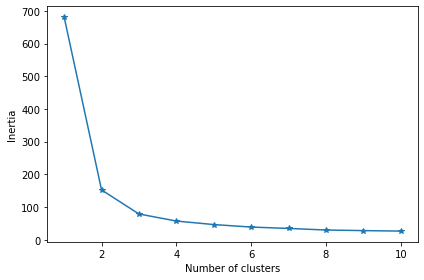

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 11), inertiaValue, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
print(inertiaValue)
plt.show()

In [10]:
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=3)

In [11]:
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
Inertia: 78.94084142614601


In [12]:
df['PredictedClusterID']=predictedCluster
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PredictedClusterID
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2
5,6,5.4,3.9,1.7,0.4,Iris-setosa,2
6,7,4.6,3.4,1.4,0.3,Iris-setosa,2
7,8,5.0,3.4,1.5,0.2,Iris-setosa,2
8,9,4.4,2.9,1.4,0.2,Iris-setosa,2
9,10,4.9,3.1,1.5,0.1,Iris-setosa,2


No handles with labels found to put in legend.


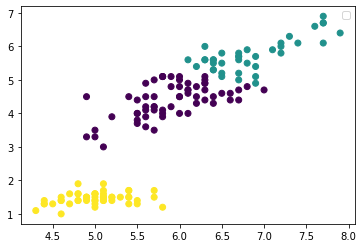

In [13]:
plt.scatter(x=df['SepalLengthCm'], y=df['PetalLengthCm'], c=df['PredictedClusterID'])
plt.legend()

No handles with labels found to put in legend.


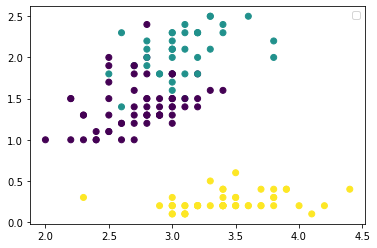

In [14]:
plt.scatter(x=df['SepalWidthCm'], y=df['PetalWidthCm'], c=df['PredictedClusterID'])
plt.legend()